Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


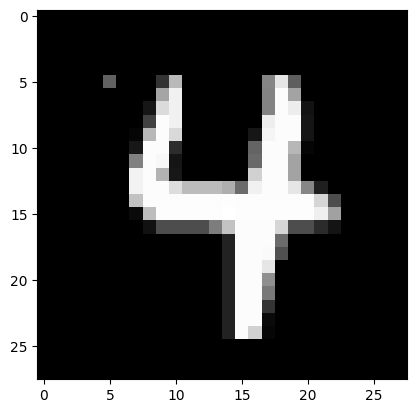

4
Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1688/1688 [==============================] - 9s 5ms/step - loss: 2.1684 - accuracy: 0.3806 - val_loss: 1.9625 - val_accuracy: 0.5548
Epoch 2/100
1688/1688 [==============================] - 9s 6ms/step - loss

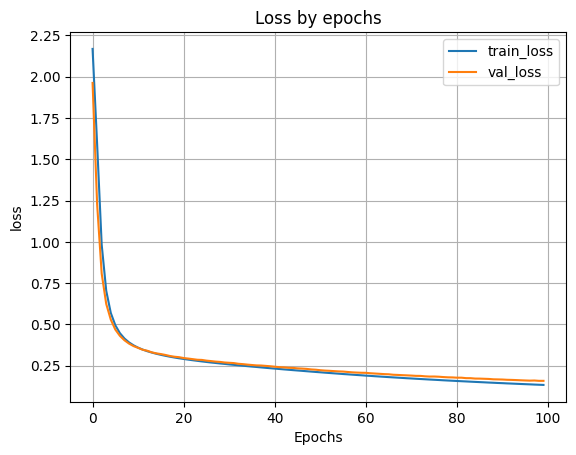

313/313 [==============================] - 2s 7ms/step - loss: 0.1524 - accuracy: 0.9552
Loss on test data: 0.15243412554264069
Accuracy on test data: 0.9552000164985657
1/1 [==============================] - 0s 182ms/step
NN output: [[3.53235863e-09 9.95641589e-01 1.20941375e-04 1.74949039e-03
  2.07344601e-05 3.33555363e-05 2.47526987e-05 1.29791012e-03
  1.95150482e-04 9.16169665e-04]]


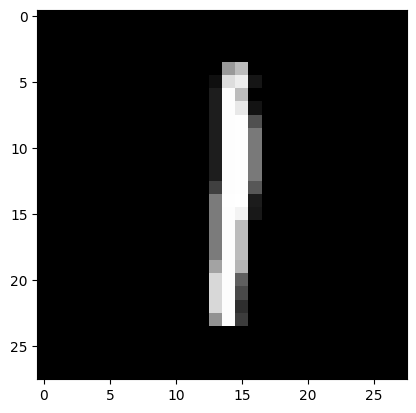

Real mark:  1
NN answer:  1


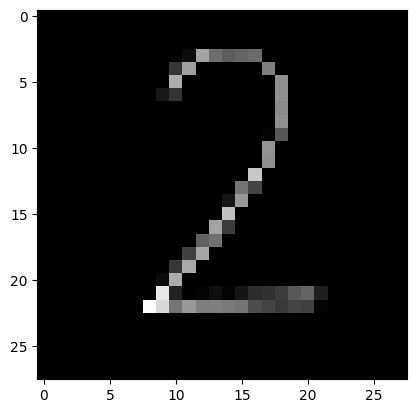

1/1 [==============================] - 0s 41ms/step
I think it's  2


In [13]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from sklearn.model_selection import train_test_split

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 10000, 
                                                    train_size = 60000,
                                                    random_state = 123)
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.show()

print(y_train[123])

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255

print('Shape of transformed X train:', X_train.shape)

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

model = Sequential()

model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))

model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model.summary())

H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))

plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

from PIL import Image
file_data = Image.open('test.png')
file_data = file_data.convert('L')
test_img = np.array(file_data)

plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()

test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)

result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))